In [3]:
!pip3 install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


c:\Users\nstep\TSU\Samad\Uncertainty\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


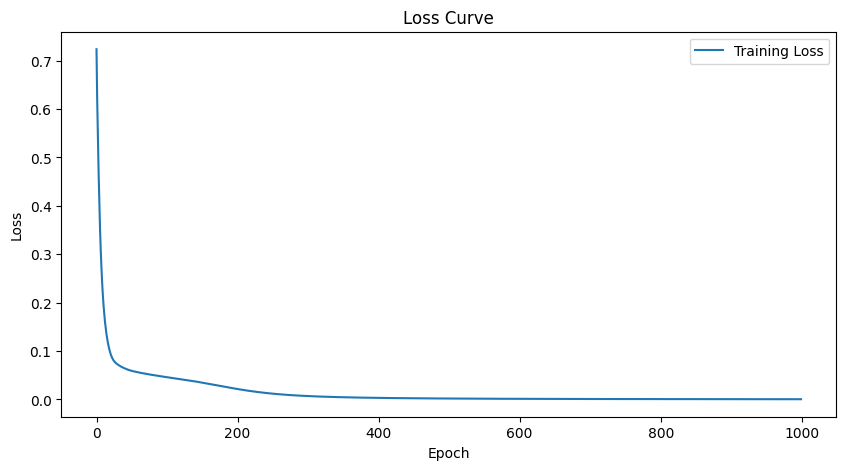

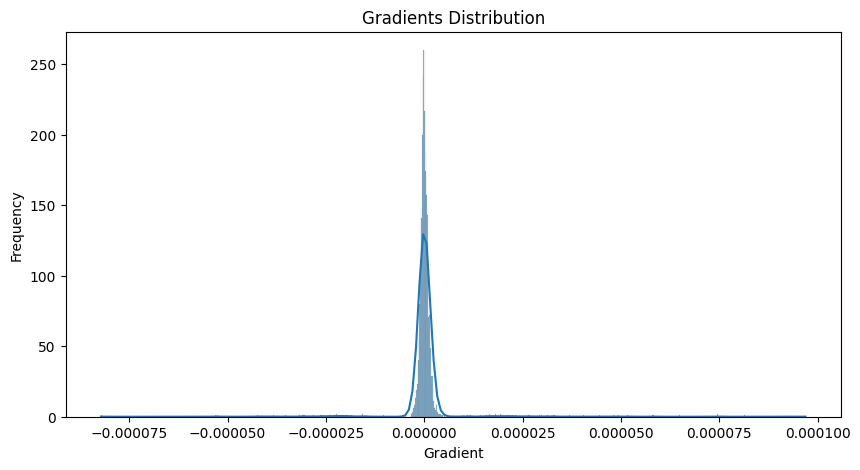

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the Bayesian Neural Network (BNN) model
class BNN(nn.Module):
    def __init__(self, n_input, n_output):
        super(BNN, self).__init__()
        self.fc1 = nn.Linear(n_input, 100)
        self.fc2 = nn.Linear(100, n_output)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return torch.sigmoid(self.fc2(x))

# Initialize the BNN model, loss function, and optimizer
model = BNN(X_train.shape[1], 1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the BNN model
num_epochs = 1000
losses = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Measure uncertainty using gradients
gradients = []
for p in model.parameters():
    gradients.append(p.grad.view(-1))
gradients = torch.cat(gradients).detach().numpy()

# Plot the gradients distribution
plt.figure(figsize=(10, 5))
sns.histplot(gradients, kde=True)
plt.xlabel('Gradient')
plt.ylabel('Frequency')
plt.title('Gradients Distribution')
plt.show()
